In [1]:
import pandas as pd
df = pd.read_csv(r"C:\Users\Bluepal\Desktop\Data_Analytics_Employees\Excell_sheets\clean_employee_dataset.csv", sep=';')

def safe_split_multi_sep(x):
    if pd.isna(x):
        return []
    x = str(x).replace(';', ',')      
    return [i.strip().title() for i in x.split(',') if i.strip() != '']

df['department'] = df['department'].apply(safe_split_multi_sep)
df['skills'] = df['skills'].apply(safe_split_multi_sep)

In [4]:
df_exploded= df.explode('department')


In [34]:
salary_insights = (
df_exploded.groupby(["department", "designation"], dropna=True)["salary"]
.mean()
.reset_index()
)

df_exploded_reset = df_exploded.reset_index(drop=True)



C:\Users\Bluepal\AppData\Local\Temp\ipykernel_7688\462070887.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


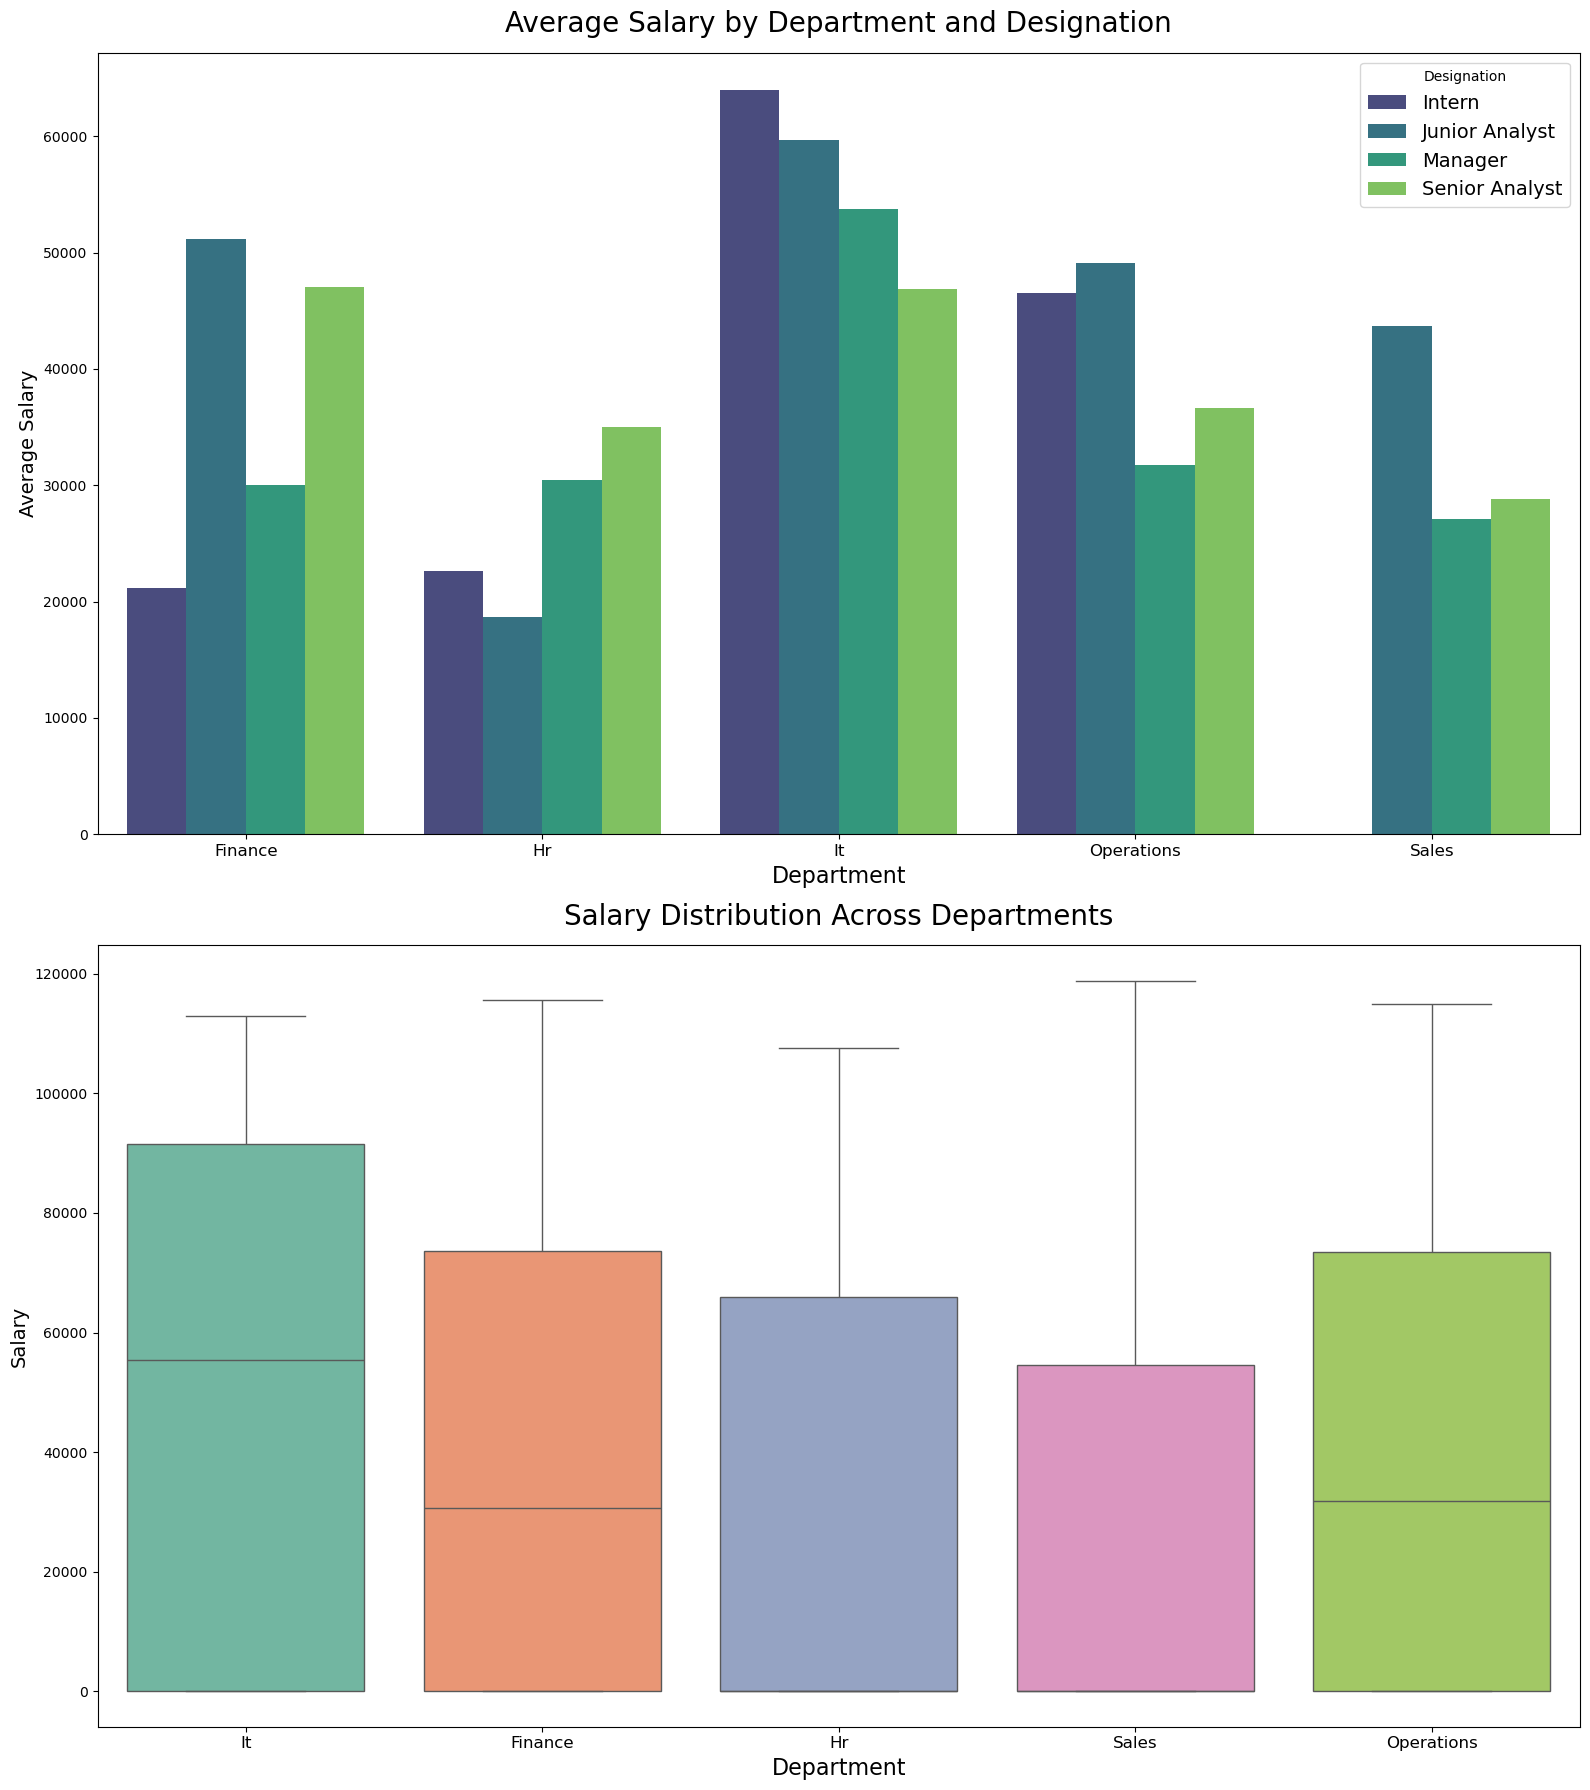

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, axes = plt.subplots(2, 1, figsize=(16, 18))

sns.barplot(
data=salary_insights,
x="department", 
y="salary",
hue="designation",
palette="viridis",
ax=axes[0]
)
axes[0].set_title("Average Salary by Department and Designation", fontsize=20,pad=15)
axes[0].set_xlabel("Department", fontsize= 16)
axes[0].set_ylabel("Average Salary", fontsize= 14)
axes[0].tick_params(axis='x', labelsize=12)
axes[0].legend(title="Designation", loc='upper right', fontsize=14, frameon=True)

sns.boxplot(
    data=df_exploded_reset,
    x="department",
    y="salary",
    palette="Set2",
    ax=axes[1]
)
axes[1].set_title("Salary Distribution Across Departments", fontsize=20, pad=15)  
axes[1].set_xlabel("Department", fontsize=16)
axes[1].set_ylabel("Salary", fontsize=14)
axes[1].tick_params(axis='x', labelsize=12)

plt.subplots_adjust(hspace=0.80)
plt.tight_layout()
plt.show()

